In [2]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set display and plotting options
pd.set_option('display.max_columns', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

In [3]:
# 1. Load the Datasets

# File paths
fraud_path = '../../data/raw/Fraud_Data.csv'
ip_path = '../../data/raw/IpAddress_to_Country.csv'
credit_path = '../../data/raw/creditcard.csv'

# Load data
fraud = pd.read_csv(fraud_path)
ip_map = pd.read_csv(ip_path)
credit = pd.read_csv(credit_path)

print('Fraud_Data shape:', fraud.shape)
print('IpAddress_to_Country shape:', ip_map.shape)
print('creditcard shape:', credit.shape)

Fraud_Data shape: (151112, 11)
IpAddress_to_Country shape: (138846, 3)
creditcard shape: (284807, 31)


In [4]:
# 2. Inspect Data and Types

# Fraud data
display(fraud.head())
fraud.info()

# Credit card data
display(credit.head())
credit.info()

# IP mapping
display(ip_map.head())
ip_map.info()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [5]:
# 3. Check for Missing Values and Duplicates

# Missing values
print('Fraud_Data missing values:')
print(fraud.isnull().sum())
print('creditcard missing values:')
print(credit.isnull().sum())
print('IpAddress_to_Country missing values:')
print(ip_map.isnull().sum())

# Duplicates
print('Fraud_Data duplicates:', fraud.duplicated().sum())
print('creditcard duplicates:', credit.duplicated().sum())
print('IpAddress_to_Country duplicates:', ip_map.duplicated().sum())

Fraud_Data missing values:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
creditcard missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
IpAddress_to_Country missing values:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
Fraud_Data duplicates: 0
creditcard duplicates: 1081
IpAddress_to_Country duplicates: 0


In [6]:
# 4. Data Type Corrections (if needed)

# Convert time columns to datetime in fraud data
fraud['signup_time'] = pd.to_datetime(fraud['signup_time'], errors='coerce')
fraud['purchase_time'] = pd.to_datetime(fraud['purchase_time'], errors='coerce')

# For creditcard, 'Time' is seconds since first transaction
# No conversion needed unless for feature engineering

# IP mapping: no conversion needed
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


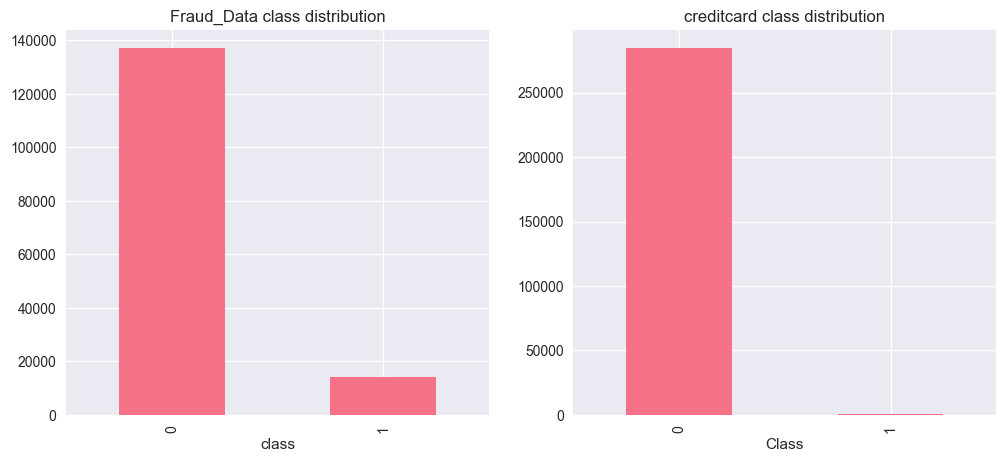

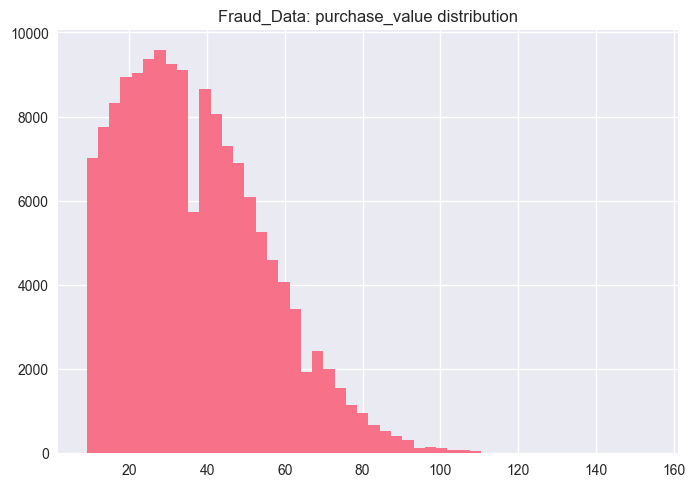

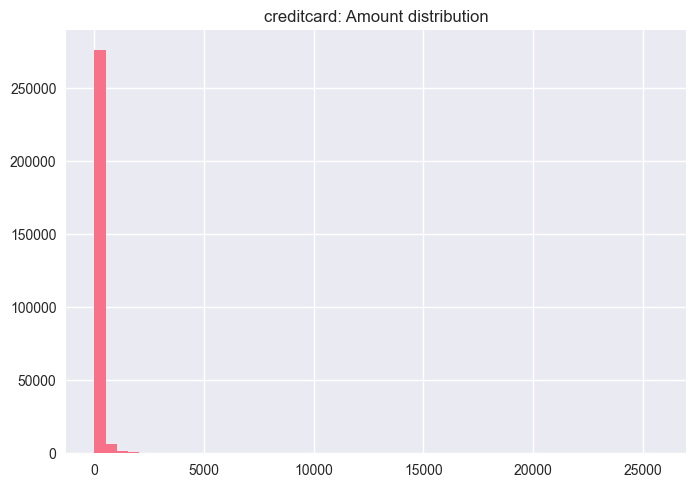

In [7]:
# 5. Univariate Analysis (Distributions)

# Plot class distribution for both datasets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fraud['class'].value_counts().plot(kind='bar', ax=axes[0], title='Fraud_Data class distribution')
credit['Class'].value_counts().plot(kind='bar', ax=axes[1], title='creditcard class distribution')
plt.show()

# Plot distributions for some numeric features
fraud['purchase_value'].hist(bins=50)
plt.title('Fraud_Data: purchase_value distribution')
plt.show()

credit['Amount'].hist(bins=50)
plt.title('creditcard: Amount distribution')
plt.show()

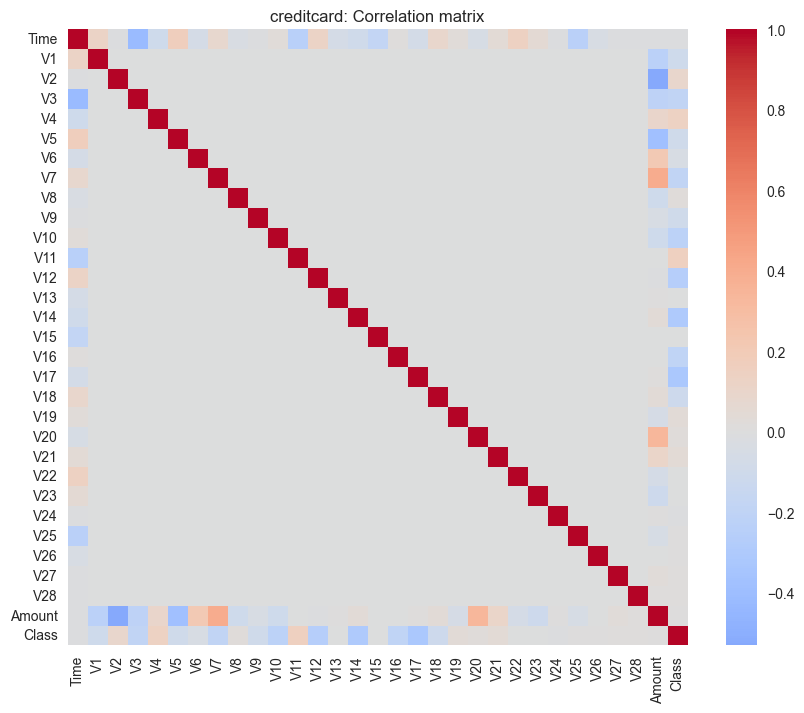

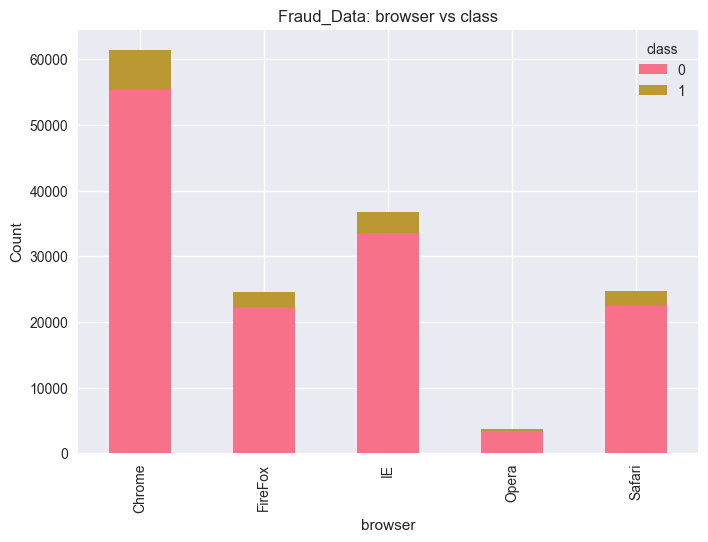

In [8]:
# 6. Bivariate Analysis (Correlations, Crosstabs)

# Correlation matrix for creditcard
corr = credit.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('creditcard: Correlation matrix')
plt.show()

# Crosstab for fraud data: browser vs class
pd.crosstab(fraud['browser'], fraud['class']).plot(kind='bar', stacked=True)
plt.title('Fraud_Data: browser vs class')
plt.ylabel('Count')
plt.show()

In [11]:
# 7. Save Cleaned Data (Optional)

# Remove duplicates
fraud_clean = fraud.drop_duplicates()
credit_clean = credit.drop_duplicates()
ip_map_clean = ip_map.drop_duplicates()

# Save cleaned data (optional)
fraud_clean.to_csv('../../data/processed/Fraud_Data_clean.csv', index=False)
credit_clean.to_csv('../../data/processed/creditcard_clean.csv', index=False)
ip_map_clean.to_csv('../../data/processed/IpAddress_to_Country_clean.csv', index=False)